In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('beer.csv', index_col='index')

In [3]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
index,,,,,,,,,,,,,,,,,,
40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
BEER_COLUMNS = ['beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name', 'beer/style']
REVIEW_COLUMNS = ['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
                  'review/taste', 'review/text', 'review/timeUnix']
USER_COLUMNS = ['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender',
                'user/profileName']

beer_df = df[BEER_COLUMNS].rename(
    columns={'beer/ABV': 'ABV', 'beer/beerId': 'id', 
             'beer/brewerId': 'brewerId', 'beer/name': 'name',
            'beer/style': 'style'}).drop_duplicates().set_index('id')
review_df = df[REVIEW_COLUMNS + ['beer/beerId', 'user/profileName']].rename(
    columns={'review/appearance': 'appearance', 'review/aroma': 'aroma',
             'review/overall': 'overall', 'review/palate': 'palate',
             'review/taste': 'taste', 'review/text': 'text',
             'review/timeStruct': 'timeStruct', 'review/timeUnix': 'timeUnix',
            'beer/beerId': 'beer/id', 'user/profileName': 'user/profileName'})
user_df = df[USER_COLUMNS].rename(
    columns={'user/ageInSeconds': 'ageInSeconds', 'user/birthdayRaw': 'birthdayRaw',
             'user/birthdayUnix': 'birthdayUnix', 'user/gender': 'gender',
             'user/profileName': 'profileName'}).drop_duplicates().set_index('profileName')

In [5]:
review_df['timeUnix'] = pd.to_datetime(1000000000 * review_df['timeUnix'])

In [6]:
df.shape, beer_df.shape, review_df.shape, user_df.shape

((37500, 18), (1731, 4), (37500, 9), (7442, 4))

In [7]:
AGG_FUNCS = [np.max, np.min, np.mean, np.std, np.median, 'count']

agg_user_reviews = review_df.groupby('user/profileName').aggregate(
    {'overall': AGG_FUNCS, 'palate': AGG_FUNCS, 'taste': AGG_FUNCS,
    'appearance': AGG_FUNCS, 'aroma': AGG_FUNCS})
agg_user_reviews.head()

overall                                   palate            \
                    amax amin  mean       std median count   amax amin mean   
user/profileName                                                              
0110x011             5.0  4.5  4.75  0.353553   4.75     2    5.0  4.0  4.5   
05Harley             4.5  2.5  3.80  0.758288   4.00     5    4.5  3.5  4.1   
0tt0                 4.0  4.0  4.00       NaN   4.00     1    3.0  3.0  3.0   
100floods            4.0  4.0  4.00       NaN   4.00     1    4.5  4.5  4.5   
1099                 4.5  4.5  4.50       NaN   4.50     1    3.0  3.0  3.0   

                            ...  appearance                        aroma       \
                       std  ...        mean       std median count  amax amin   
user/profileName            ...                                                 
0110x011          0.707107  ...         4.0  0.707107    4.0     2   4.5  3.5   
05Harley          0.418330  ...         4.3  0.570088    4.5     5   4.5  3.0   
0tt0                   NaN  ...         4.0       NaN    4.0     1   3.5  3.5   
100floods              NaN  ...         4.0       NaN    4.0     1   5.0  5.0   
1099                   NaN  ...         4.0       NaN    4.0     1   3.5  3.5   

                                              
                 mean       std median count  
user/profileName                              
0110x011          4.0  0.707107    4.0     2  
05Harley          3.8  0.570088    4.0     5  
0tt0              3.5       NaN    3.5     1  
100floods         5.0       NaN    5.0     1  
1099              3.5       NaN    3.5     1  

[5 rows x 30 columns]

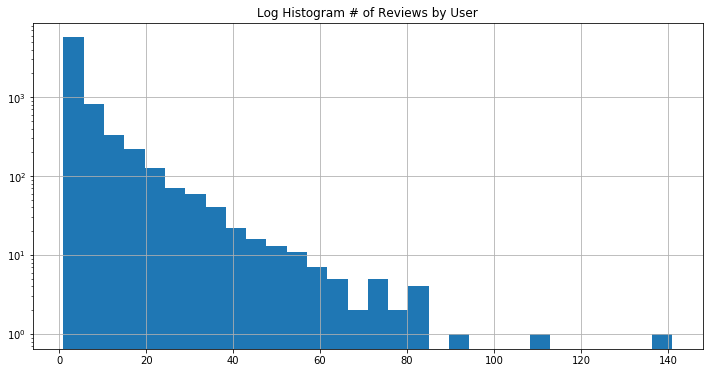

In [8]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.hist(review_df.groupby('user/profileName').size().values, bins=30, log=True);
plt.title('Log Histogram # of Reviews by User');

In [9]:
style_counts = beer_df['style'].value_counts()

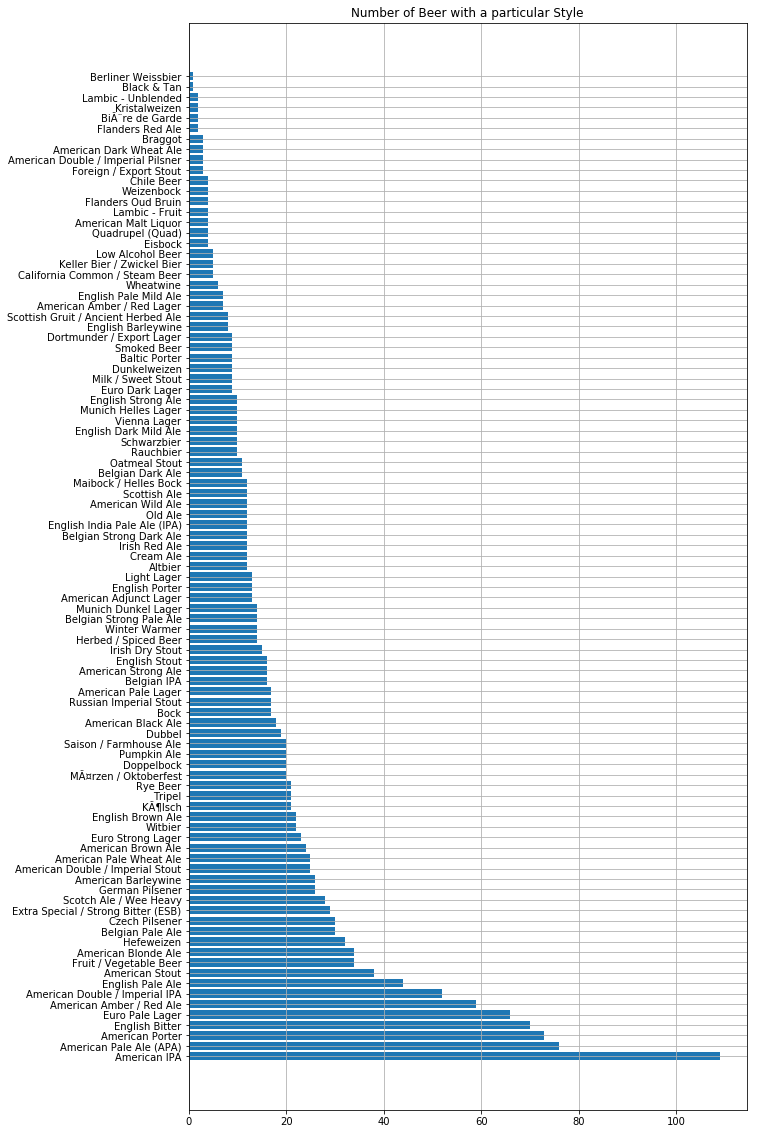

In [10]:
plt.figure(figsize=(10, 20))
plt.grid()
plt.barh(np.arange(len(style_counts)), style_counts, tick_label=style_counts.index);
plt.title('Number of Beer with a particular Style');

In [11]:
def hist_of_score(score_name):
    plt.figure(figsize=(10, 7))
    plt.hist(review_df[score_name])
    plt.title(f"Histogram of '{score_name}' scores")
    plt.xlabel(f"'{score_name}' Score")
    plt.ylabel(f"Count")

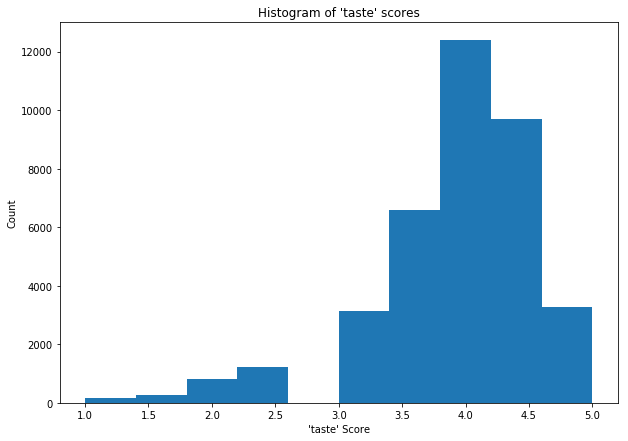

In [12]:
hist_of_score('taste')

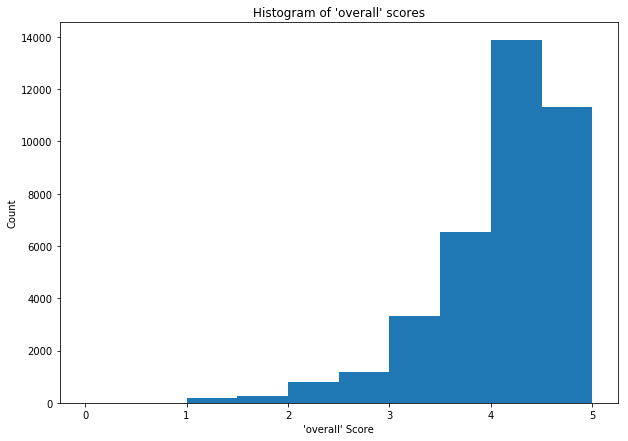

In [13]:
hist_of_score('overall')

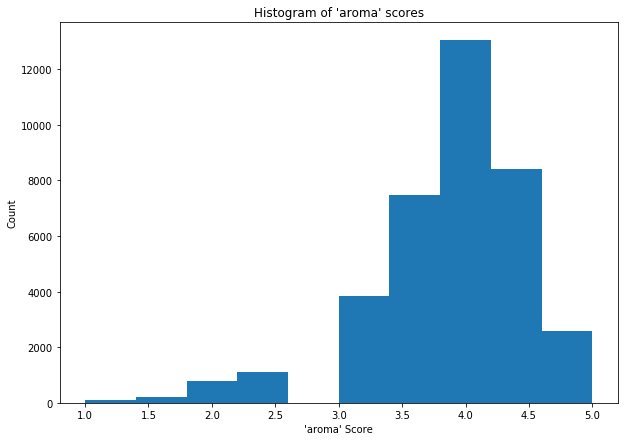

In [14]:
hist_of_score('aroma')

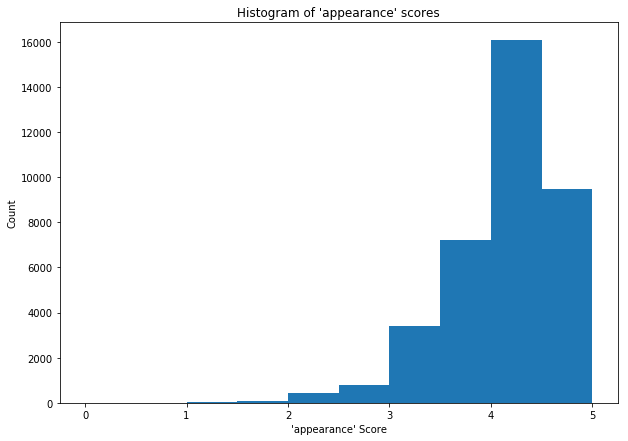

In [15]:
hist_of_score('appearance')

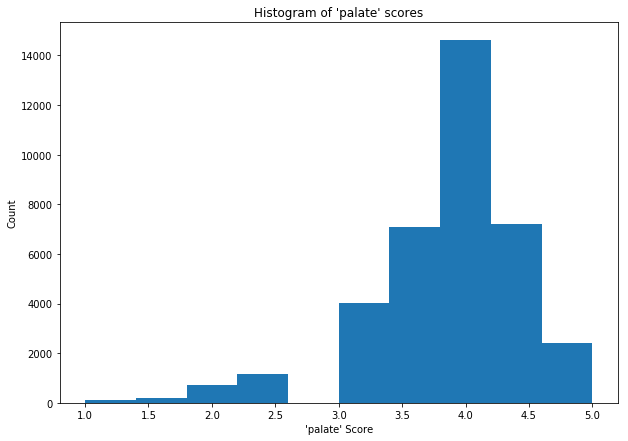

In [16]:
hist_of_score('palate')

In [17]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

In [18]:
regr = linear_model.LinearRegression(fit_intercept=False)
cross_validate(regr, review_df[['appearance', 'aroma', 'taste', 'palate']],
               review_df['overall'], cv=5, return_train_score=True)

{'fit_time': array([ 0.0058279 ,  0.00305438,  0.00305915,  0.00303078,  0.00304723]),
 'score_time': array([ 0.00107622,  0.00092673,  0.00092363,  0.00092864,  0.00092387]),
 'test_score': array([ 0.64399165,  0.65580299,  0.64916477,  0.64047843,  0.64236378]),
 'train_score': array([ 0.64726721,  0.64420016,  0.64594433,  0.64811049,  0.64763447])}